#### Site:  [Kaggle E-Commerce](https://www.kaggle.com/datasets/mervemenekse/ecommerce-dataset)

##### **Columns name and meanings**:  

**Order_Date**: The date the product was ordered.  
**Aging (lead_time)**: The time from the day the product is ordered to the day it is delivered.  
**Customer_id**: Unique id created for each customer.  
**Gender**: Gender of customer.  
**Device_Type**: The device the customer uses to actualize the transaction (Web/Mobile).  
**Customer_Login_Type**: The type the customer logged in. Such as Member, Guest etc.  
**Product_Category**: Product category  
**Product**: Product  
**Sales**: Total sales amount  
**Quantity**: Unit amount of product  
**Discount**: Percent discount rate  
**Profit**: Profit  
**Shipping_cost**: Shipping cost  
**Order_Priority**: Order priority. Such as critical, high etc.  
**Payment_method**: Payment method )  

# Análise Exploratória de Dados - E-commerce 2018

#### Objetivos da Análise é extrair insights a partir das movimentações no e-commerce, identificando oportunidades para reduzir perdas, investir em áreas de maior retorno e planejar ações futuras que alinhem nossa operação às expectativas dos clientes, aumentando as chances de conversão

### Análise de Vendas e Produtos
- Avaliar o desempenho de vendas por categoria e produto
- Identificar produtos com melhor performance
- E vou expandindo conforme as idéias pararecerem nas análises

### Análise de Clientes
- Perfil demográfico dos clientes
- Comportamento de compra por tipo de login
- Análise de gastos por segmento
- E vou expandindo conforme as idéias pararecerem nas análises

### Análise Operacional
- Desempenho logístico (tempo de entrega, frete)
- Canais de aquisição de clientes
- E vou expandindo conforme as idéias pararecerem nas análises

In [2]:
# configura caminho padrão
from utils.init_project import init_project
init_project()

✅ Projeto inicializado! Raiz: H:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\america_ecommerce


WindowsPath('H:/Portifolios_e_anotacoes_Jackson/PORTIFÓLIOS/america_ecommerce')

In [3]:
#Libs
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# importa pacotes/funções
from data_extraction.csv_extraction import extract_csv_processed
from features.outliers import detect_outliers
from visualization.basic_charts import grafico_linha, grafico_barra, grafico_area, grafico_pizza, grafico_frequencia
from visualization.distribution_charts import grafico_boxplot, grafico_distribuicao, grafico_qq, grafico_violin
from visualization.relationship_charts import grafico_matriz_correlacao, grafico_dispersao


# Ingestão dos dados

In [4]:
input_path = 'file_exploration.csv'
df = extract_csv_processed(input_path, parse_dates=['order_date'])
df

,order_date,time,lead_time,customer_id,gender,device_type,customer_login_type,product_category,product,sales,quantity,discount,profit,shipping_cost,order_priority,payment_method
0,2018-01-02,10:56:33,8,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1,0.3,160.0,16.0,Critical,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51277,2018-02-28,22:59:50,6,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4,0.3,19.2,1.9,Medium,money_order
51278,2018-02-28,13:19:25,2,91941,Female,Mobile,Member,Home & Furniture,Umbrellas,70.0,5,0.2,14.0,1.4,Medium,credit_card
51279,2018-02-28,10:25:07,6,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1,0.3,39.7,4.0,Medium,credit_card
51280,2018-02-28,10:50:08,7,86485,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,1,0.2,131.7,13.2,Medium,credit_card


#### Transfomrações básicas para iniciarmos nossas análises em seguida

##### Irei fazer a junção das colunas order_date e time para termos uma coluna com as datas e as horas que foi feito os pedidos, assim terei a possibilidade de efetuar análises mais amplas como ordenar eventos pela data e hora quanto pegar padrões diários por exemplo: vendas por dia, mês ou ano.

In [5]:
# Cria coluna order_datetime 
datetime = df['order_date'] + pd.to_timedelta(df['time'])
df.insert(0, 'order_datetime', datetime)

In [6]:
# Opcional tranformar a coluna order_date em index
df = df.rename(columns={'order_date' : 'dt'}).copy()
df = df.set_index('dt').copy()
df

,order_datetime,time,lead_time,customer_id,gender,device_type,customer_login_type,product_category,product,sales,quantity,discount,profit,shipping_cost,order_priority,payment_method
dt,,,,,,,,,,,,,,,,
2018-01-02,2018-01-02 10:56:33,10:56:33,8,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1,0.3,46.0,4.6,Medium,credit_card
2018-07-24,2018-07-24 20:41:37,20:41:37,2,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1,0.3,112.0,11.2,Medium,credit_card
2018-11-08,2018-11-08 08:38:49,08:38:49,8,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5,0.1,31.2,3.1,Critical,credit_card
2018-04-18,2018-04-18 19:28:06,19:28:06,7,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1,0.3,26.2,2.6,High,credit_card
2018-08-13,2018-08-13 21:18:39,21:18:39,9,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1,0.3,160.0,16.0,Critical,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-28,2018-02-28 22:59:50,22:59:50,6,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4,0.3,19.2,1.9,Medium,money_order
2018-02-28,2018-02-28 13:19:25,13:19:25,2,91941,Female,Mobile,Member,Home & Furniture,Umbrellas,70.0,5,0.2,14.0,1.4,Medium,credit_card
2018-02-28,2018-02-28 10:25:07,10:25:07,6,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1,0.3,39.7,4.0,Medium,credit_card


In [7]:
print(f'Data Inicial: {df.index.min()} \nData Final: {df.index.max()}')

Data Inicial: 2018-01-01 00:00:00 
Data Final: 2018-12-30 00:00:00


# Análise Exploratória (EDA)

In [8]:
# Shape
print('Amostras das transações: ')
print(f'Linhas: {df.shape[0]} \nColunas: {df.shape[1]}')

Amostras das transações: 
Linhas: 51282 
Colunas: 16


In [9]:
#informação do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51282 entries, 2018-01-02 to 2018-02-28
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_datetime       51282 non-null  datetime64[ns]
 1   time                 51282 non-null  object        
 2   lead_time            51282 non-null  int64         
 3   customer_id          51282 non-null  int64         
 4   gender               51282 non-null  object        
 5   device_type          51282 non-null  object        
 6   customer_login_type  51282 non-null  object        
 7   product_category     51282 non-null  object        
 8   product              51282 non-null  object        
 9   sales                51282 non-null  float64       
 10  quantity             51282 non-null  int64         
 11  discount             51282 non-null  float64       
 12  profit               51282 non-null  float64       
 13  shipping_cost 

In [10]:
# Dados Nulos
df.isnull().sum()

order_datetime         0
time                   0
lead_time              0
customer_id            0
gender                 0
device_type            0
customer_login_type    0
product_category       0
product                0
sales                  0
quantity               0
discount               0
profit                 0
shipping_cost          0
order_priority         0
payment_method         0
dtype: int64

In [11]:
# Observa dados duplicados
df.duplicated().sum()

np.int64(0)

In [12]:
df.columns

Index(['order_datetime', 'time', 'lead_time', 'customer_id', 'gender',
       'device_type', 'customer_login_type', 'product_category', 'product',
       'sales', 'quantity', 'discount', 'profit', 'shipping_cost',
       'order_priority', 'payment_method'],
      dtype='object')

#### Análise estatísticas básicas

In [13]:
# Estatística Básica do Dataframe
df[['lead_time', 'sales', 'quantity', 'discount', 'profit', 'shipping_cost']].describe()

,lead_time,sales,quantity,discount,profit,shipping_cost
count,51282.000000,51282.000000,51282.000000,51282.000000,51282.000000,51282.000000
mean,5.255177,152.337350,2.502964,0.303838,70.401796,7.041166
std,2.960056,66.492468,1.511834,0.131025,48.728131,4.871685
min,1.000000,33.000000,1.000000,0.100000,0.500000,0.100000
25%,3.000000,85.000000,1.000000,0.200000,24.900000,2.500000
50%,5.000000,133.000000,2.000000,0.300000,59.900000,6.000000
75%,8.000000,218.000000,4.000000,0.400000,118.400000,11.800000
max,10.000000,250.000000,5.000000,0.500000,167.500000,16.800000


### Análise Preliminar de Dados Numéricos
### A análise inicial dos dados numéricos revelou características importantes sobre sua distribuição.

#### Observamos que o desvio padrão de certas variáveis é consideravelmente alto, indicando uma alta dispersão e a existência de valores que se desviam significativamente da média. No entanto, a pequena diferença entre a média e a mediana sugere que a distribuição dos dados não é marcadamente assimétrica. Isso nos permite inferir que, apesar da variabilidade, a maior parte dos valores está agrupada em torno do centro da distribuição.

In [14]:
# Outlier
detect_outliers(df)

,coluna,outliers_count,outliers_percentage,lower_limit,upper_limit,min_value,max_value
0,lead_time,0,0.0,-4.500,15.500,1.0,10.0
1,customer_id,0,0.0,-31505.125,148085.875,10000.0,99999.0
2,sales,0,0.0,-114.500,417.500,33.0,250.0
3,quantity,0,0.0,-3.500,8.500,1.0,5.0
4,discount,0,0.0,-0.100,0.700,0.1,0.5
5,profit,0,0.0,-115.350,258.650,0.5,167.5
6,shipping_cost,0,0.0,-11.450,25.750,0.1,16.8


# Análise de vendas e produtos

In [15]:
df.sort_index()

,order_datetime,time,lead_time,customer_id,gender,device_type,customer_login_type,product_category,product,sales,quantity,discount,profit,shipping_cost,order_priority,payment_method
dt,,,,,,,,,,,,,,,,
2018-01-01,2018-01-01 18:58:44,18:58:44,4,89412,Male,Web,Member,Home & Furniture,Bed Sheets,211.0,4,0.2,122.6,12.3,Medium,debit_card
2018-01-01,2018-01-01 20:16:08,20:16:08,8,93952,Male,Web,Guest,Home & Furniture,Sofas,67.0,5,0.2,13.4,1.3,Medium,money_order
2018-01-01,2018-01-01 16:34:38,16:34:38,5,84298,Female,Web,Member,Home & Furniture,Dinner Crockery,133.0,1,0.4,42.4,4.2,Medium,money_order
2018-01-01,2018-01-01 21:45:41,21:45:41,10,83120,Female,Web,Member,Home & Furniture,Sofas,67.0,4,0.4,16.8,1.7,Medium,e_wallet
2018-01-01,2018-01-01 21:06:02,21:06:02,2,63293,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,4,0.2,127.4,12.7,Medium,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-30,2018-12-30 08:48:59,08:48:59,4,42855,Male,Web,Member,Fashion,Sports Wear,85.0,5,0.4,17.0,1.7,High,credit_card
2018-12-30,2018-12-30 20:22:57,20:22:57,1,39758,Male,Web,Member,Fashion,Suits,109.0,5,0.5,23.6,2.4,Critical,credit_card
2018-12-30,2018-12-30 12:09:11,12:09:11,4,67960,Female,Web,Member,Home & Furniture,Sofas,67.0,5,0.4,13.4,1.3,High,credit_card


#### Para efetuarmos as análises do KPIs principais irei inserir algumas colunas obrigatórias para esse fim como, receita_bruta_total: total_gross_revenue, receita_liquida_total: total_net_revenue.  
#### Com essas novas colunas conseguimos obter os dados do ticket_medio: average_ticket, margem_lucro: profit_margin, taxa_desconto_medio: avg_disc_rate, volume_venda: sales_volume.
#### Assim conseguirei alcançar meu objetivo final que é obter os KPIs principais de venda

In [16]:
# Cria coluna receita bruta total
df['total_gross_revenue'] = df['sales'] * df['quantity']

In [17]:
# Cria coluna receita liquida total
#(df['sales'] * df['quantity']) -
df['total_net_revenue'] = round((df['total_gross_revenue'] * (1 - df['discount'] / 10)), 2) # Vou considerar que o desconto dado foi na base de 1 a 5% por isso dividi por 10

In [18]:
# Receita total
print(f'Receita Total: $ {df["total_gross_revenue"].sum()}')

Receita Total: $ 19632339.0


In [19]:
# Ticket Médio das vendas
print(f'Ticket Médio das Vendas: $ {round(df["sales"].mean(), 2)}')

Ticket Médio das Vendas: $ 152.34


In [20]:
# Taxa de desconto médio da vendas
print(f'Taxa média de desconto: {round(df["discount"].mean() * 10, 1)}%')

Taxa média de desconto: 3.0%


In [21]:
# Volume de vendas
print(f'Volume vendido: {df["quantity"].sum()} produtos')

Volume vendido: 128357 produtos


In [22]:
# Top 10 produtos por receita
top10_rgr = pd.DataFrame(df.groupby('product')['total_gross_revenue'].sum().sort_values(ascending=False).reset_index().head(10))
top10_rgr

,product,total_gross_revenue
0,T - Shirts,1484528.0
1,Titak watch,1425912.0
2,Running Shoes,1358336.0
3,Formal Shoes,1310802.0
4,Jeans,1296228.0
5,Shirts,1178352.0
6,Fossil Watch,961950.0
7,Towels,862068.0
8,Sofa Covers,832032.0
9,Bed Sheets,805809.0


In [23]:
top10_rgr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product              10 non-null     object 
 1   total_gross_revenue  10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 292.0+ bytes


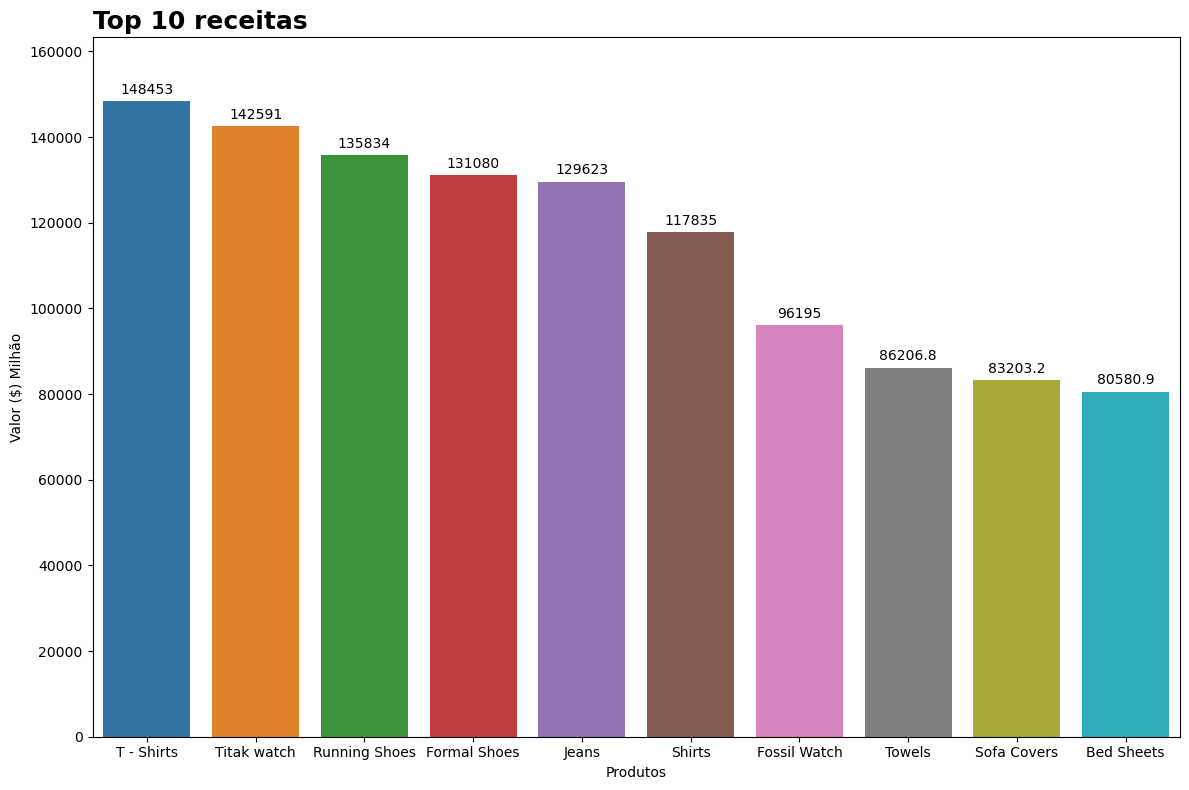

In [24]:
# Gráfico de barra
grafico_barra(top10_rgr, x= top10_rgr['product'], y= top10_rgr['total_gross_revenue']/10, hue= top10_rgr['product'], titulo='Top 10 receitas', xlabel='Produtos', ylabel='Valor ($) Milhão')


In [25]:
# categorias por lucro
top_cat_prof = pd.DataFrame(df.groupby('product_category')['profit'].sum().sort_values(ascending=False).head(5))
top_cat_prof

,profit
product_category,
Fashion,2072623.9
Home & Furniture,880058.9
Auto & Accessories,483471.5
Electronic,174190.6


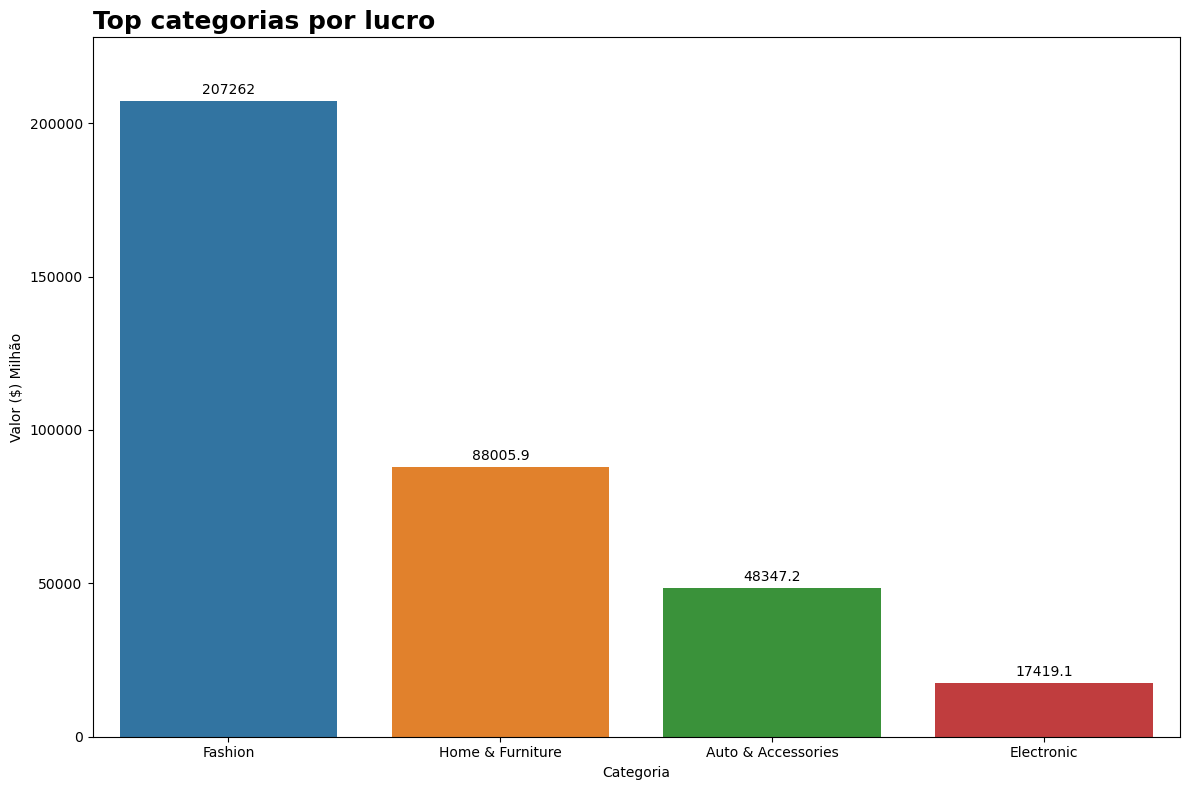

In [26]:
# Gráfico de barra
grafico_barra(top_cat_prof, x= top_cat_prof.index, y= top_cat_prof.profit/10, hue=top_cat_prof.index, titulo='Top categorias por lucro', xlabel='Categoria', ylabel='Valor ($) Milhão')

In [27]:
# Produco com maior margem de lucro
df.groupby('product')['profit'].max().sort_values(ascending=False).head(3)

product
Apple Laptop    167.5
Tyre            167.5
T - Shirts      165.5
Name: profit, dtype: float64

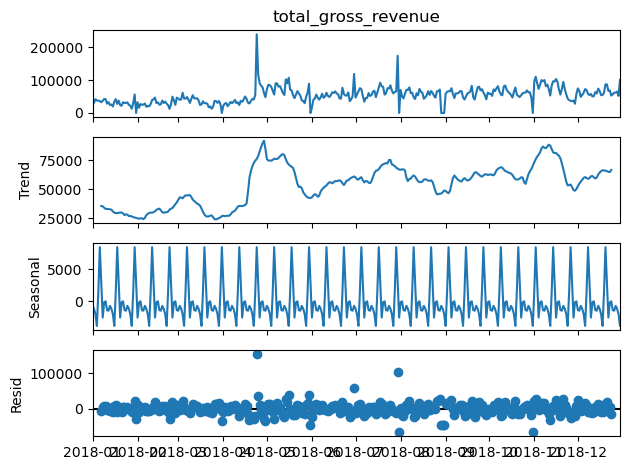

In [28]:
# Usando o seasonal decompose para conseguirmos buscar os padrãos dos dados
df_diario = df.resample("D").sum(numeric_only=True)
res = seasonal_decompose(df_diario['total_gross_revenue'], model='additive', period=12)
res.plot()
plt.show()

In [29]:
# Prepara os dados de tendência
tendencia = pd.DataFrame(res.trend.dropna())
tendencia = tendencia.reset_index()

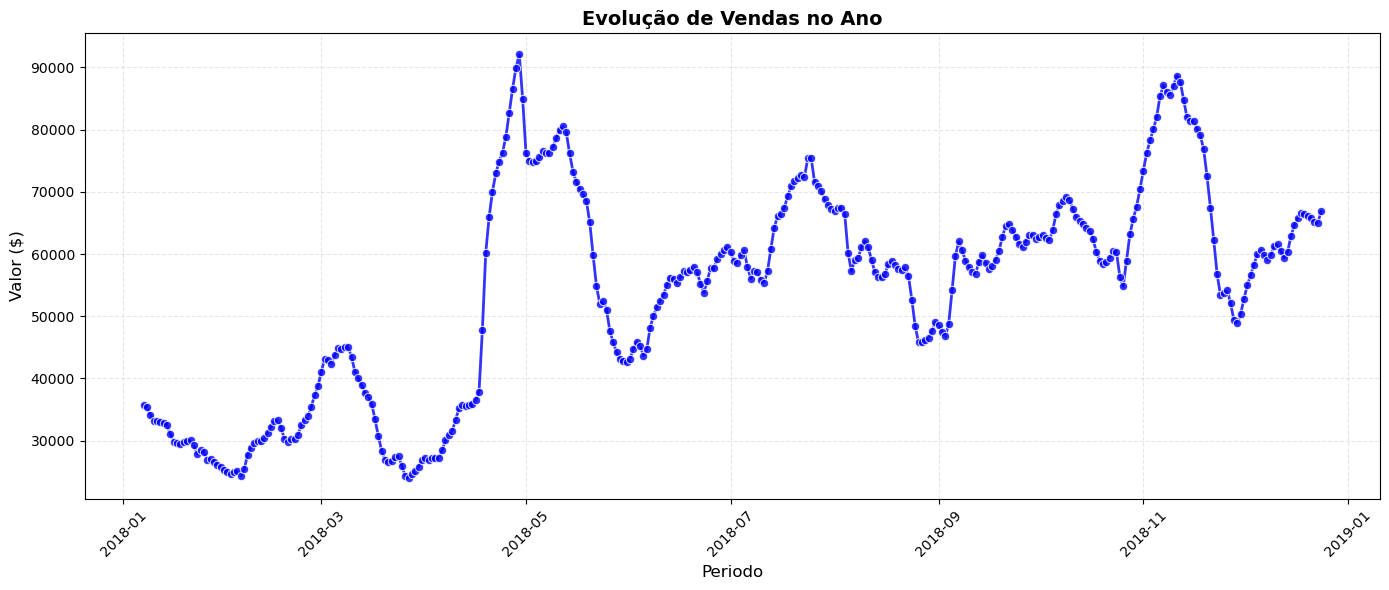

In [30]:
# Plota tendência
grafico_linha(tendencia, x='dt', y='trend', titulo='Evolução de Vendas no Ano', xlabel='Periodo', ylabel='Valor ($)', figsize=(14,6))

#### Em nosso e-commerce tivemos um pico de vendas entre o mês de abril e maio, a maior parte das vendas na américa foram moda e esse periodo é sazonal no emisfério sul que costumam trazer novas coleções outono/inverno dependendo da loja e juntando promoções de moda podendo causar um grande incentivo nas compras, esse pode ter sido um dos motivos para esse pico nesses dois meses.
#### Não deixando de citar o mês da Black Friday que anualmente atraem uma grande quantidade e variedade de clientes devido a sua grande popularidade e as lojas que sabem fazer um boa propaganda e investir no marketing certo lucra muito com essa data, nossos dados nos mostra que o mês da black Friday trouxe um volume muito alto de venda como é esperado para epoca.
#### Um insight para a loja seria investir neste dois periodos especificamente com coleções interessantes para epoca e bater forte nas promoções atraindo assim os olhares de cliente famintos por novidades de vantagens sendo no preço ou brindes.

In [31]:
# Prepara os dados de sazonalidade
sazonalidade = pd.DataFrame(res.seasonal)
sazonalidade = sazonalidade.reset_index()

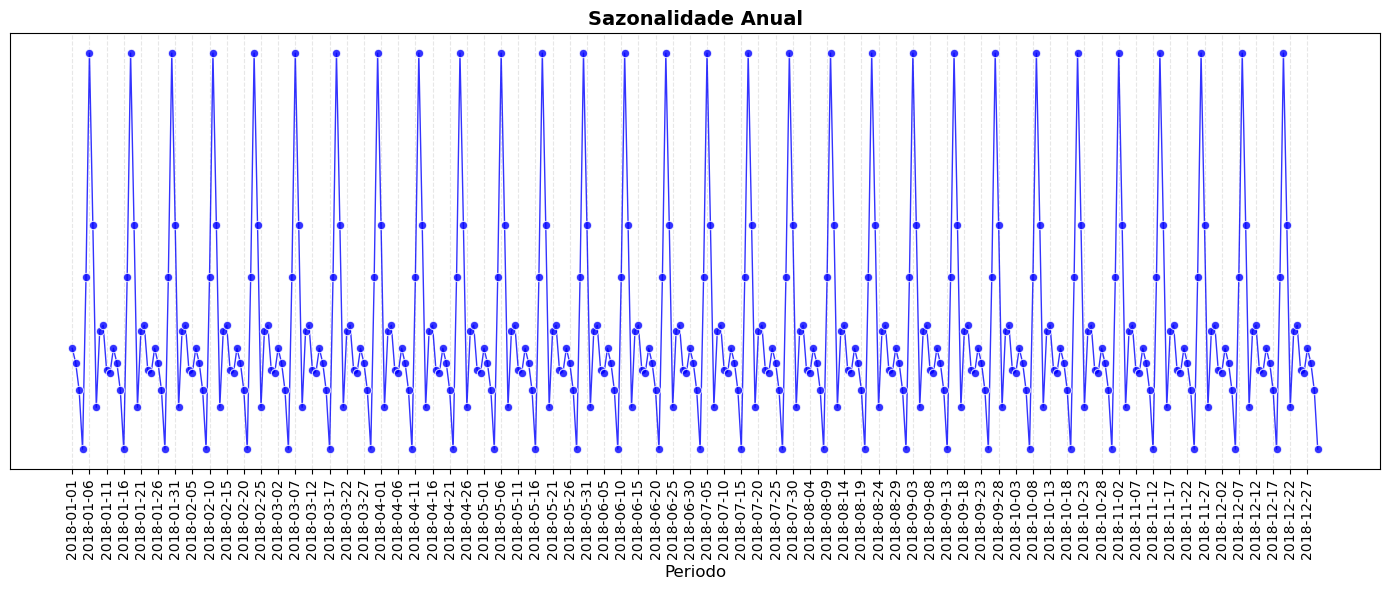

In [32]:
# Plota sasonalidade
grafico_linha(sazonalidade, x='dt', y='seasonal', titulo='Sazonalidade Anual', xlabel='Periodo', ylabel='', figsize=(14,6), linewidth=1, ytick=True, xticks_step=5, xrotaion=90)

##### O gráfico nos mostra que temos um padrão de sazonalidade na compra muito interessante entre os dias 01 a 05 e também 15 a 20, isso por conta dos dias de pagamentos recebido normalmente entre essas datas.

In [33]:
# Correlação entre desconto e quantidade
print("Corr(desconto, quantidade):", round(df["discount"].corr(df["quantity"]), 2))

# Correlação entre desconto e receita bruta
print("Corr(desconto, total receita bruta):", round(df["discount"].corr(df["total_gross_revenue"]), 2))

Corr(desconto, quantidade): 0.02
Corr(desconto, total receita bruta): 0.06


##### Correlação obtida com esses dados fora praticamente 0, então não temos correlação entre esssa variáveis

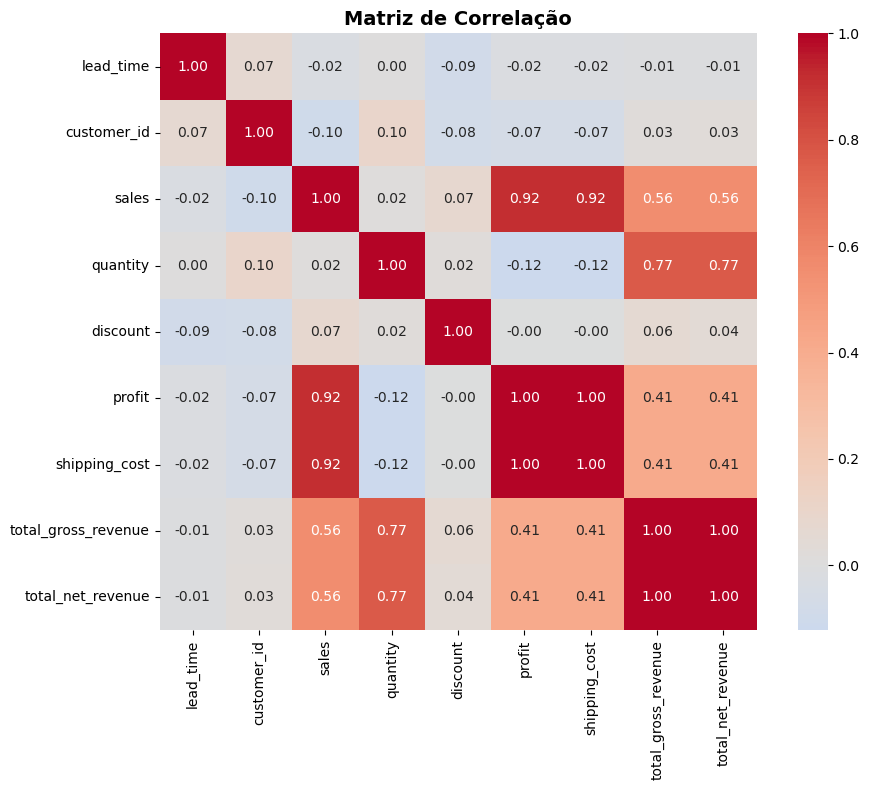

In [34]:
# Correlação do dataframe
grafico_matriz_correlacao(df)

#### Busca uma visão geral das correlações entre todas as variavéis numericas de nosso dataset, dessa maneira é possivel ter uma melhor perceçao de como os dados se comportam em relação aos seus dados vizinhos. Observando só a vendas (sales) conseguimos ter de informação que o lucro (profit) e o valor do frete (shipping_cost) tem um correlação forte positiva, sendo assim qual maior a o valor da venda maior é o lucro e por consequência o valor do frete.
#### Mas isso não é um fator relevante se levarmos em consideração uma busca por aumento das vendas, aqui só estou passando a informação básica de como lermos os gráfico em questão.

In [35]:
df

,order_datetime,time,lead_time,customer_id,gender,device_type,customer_login_type,product_category,product,sales,quantity,discount,profit,shipping_cost,order_priority,payment_method,total_gross_revenue,total_net_revenue
dt,,,,,,,,,,,,,,,,,,
2018-01-02,2018-01-02 10:56:33,10:56:33,8,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1,0.3,46.0,4.6,Medium,credit_card,140.0,135.80
2018-07-24,2018-07-24 20:41:37,20:41:37,2,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1,0.3,112.0,11.2,Medium,credit_card,211.0,204.67
2018-11-08,2018-11-08 08:38:49,08:38:49,8,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5,0.1,31.2,3.1,Critical,credit_card,585.0,579.15
2018-04-18,2018-04-18 19:28:06,19:28:06,7,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1,0.3,26.2,2.6,High,credit_card,118.0,114.46
2018-08-13,2018-08-13 21:18:39,21:18:39,9,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1,0.3,160.0,16.0,Critical,credit_card,250.0,242.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-28,2018-02-28 22:59:50,22:59:50,6,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4,0.3,19.2,1.9,Medium,money_order,496.0,481.12
2018-02-28,2018-02-28 13:19:25,13:19:25,2,91941,Female,Mobile,Member,Home & Furniture,Umbrellas,70.0,5,0.2,14.0,1.4,Medium,credit_card,350.0,343.00
2018-02-28,2018-02-28 10:25:07,10:25:07,6,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1,0.3,39.7,4.0,Medium,credit_card,133.0,129.01


In [36]:
# Forma de pagamento quantidade
metodo_pagamento = df['payment_method'].value_counts()
metodo_pagamento = metodo_pagamento.drop('not_defined', axis=0).reset_index()
metodo_pagamento

,payment_method,count
0,credit_card,38131
1,money_order,9628
2,e_wallet,2789
3,debit_card,733


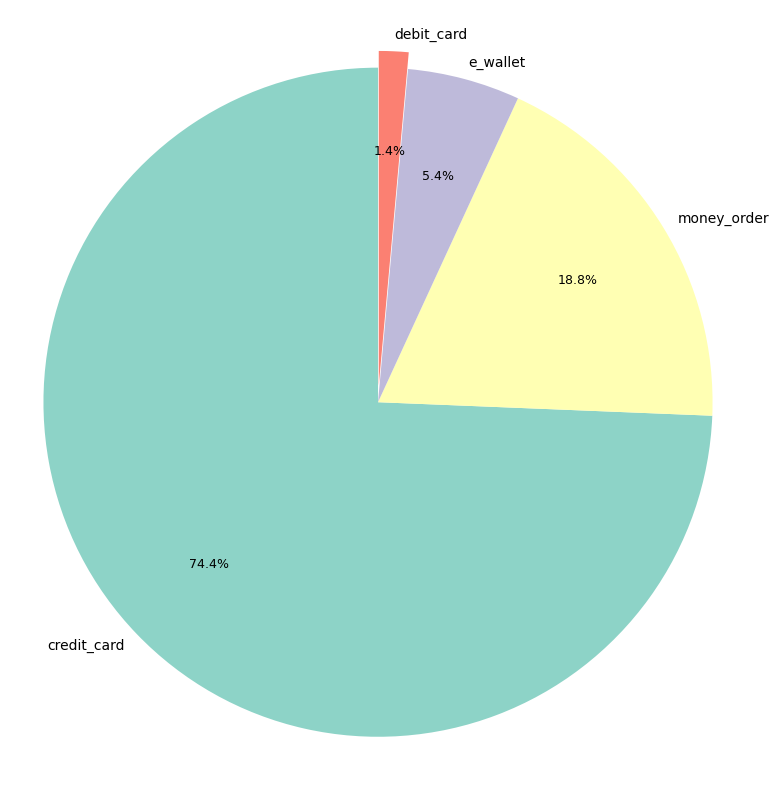

In [37]:
# Grafico pizza
grafico_pizza(metodo_pagamento, values='count', labels='payment_method')

# Obter KPIs por Seguimento

In [38]:
# Obter distribuição por Gênero
df['gender'].value_counts()

gender
Male      28132
Female    23150
Name: count, dtype: int64

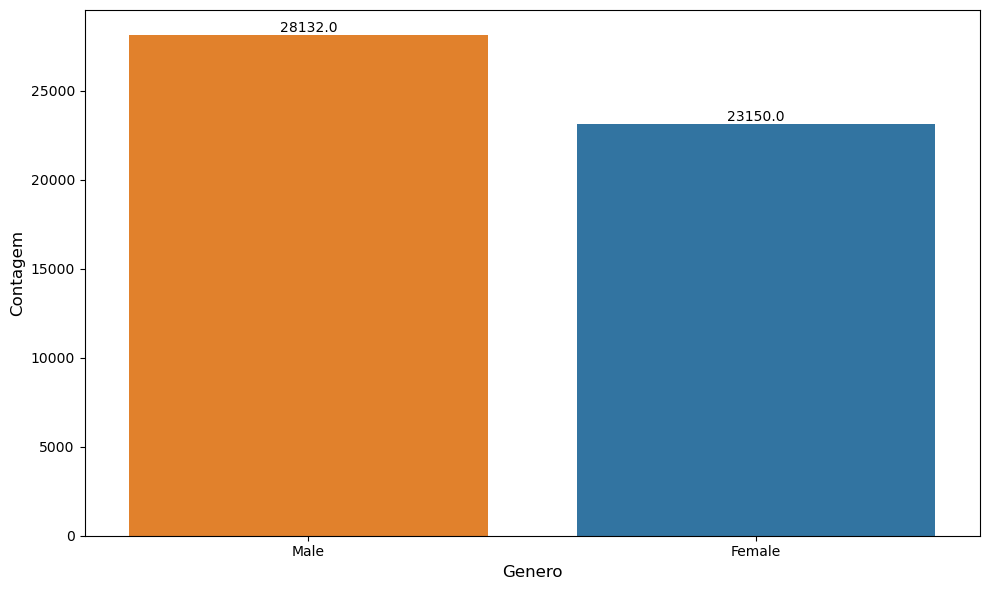

In [39]:
grafico_frequencia(df, coluna='gender', xlabel='Genero')

In [40]:
# Valor do Tempo de Vida do Cliente
df.groupby('customer_id')['sales'].sum().sort_values(ascending=False)

customer_id
87989    994.0
35324    949.0
79016    935.0
10436    929.0
51093    927.0
         ...  
57727     33.0
29977     33.0
46381     33.0
10044     33.0
10126     33.0
Name: sales, Length: 38990, dtype: float64

In [41]:
# Frequência de Compra do cliente
df['customer_id'].value_counts()

customer_id
95831    6
96842    5
79515    5
67971    5
75238    5
        ..
67333    1
95490    1
57057    1
20719    1
26767    1
Name: count, Length: 38990, dtype: int64

In [42]:
# Ticket médio do compras dos clientes
df.groupby('customer_id')['sales'].mean().sort_values(ascending=False)

customer_id
59216    250.0
15141    250.0
49047    250.0
18863    250.0
42059    250.0
         ...  
56872     33.0
14304     33.0
45013     33.0
14143     33.0
10126     33.0
Name: sales, Length: 38990, dtype: float64

In [43]:
df

,order_datetime,time,lead_time,customer_id,gender,device_type,customer_login_type,product_category,product,sales,quantity,discount,profit,shipping_cost,order_priority,payment_method,total_gross_revenue,total_net_revenue
dt,,,,,,,,,,,,,,,,,,
2018-01-02,2018-01-02 10:56:33,10:56:33,8,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1,0.3,46.0,4.6,Medium,credit_card,140.0,135.80
2018-07-24,2018-07-24 20:41:37,20:41:37,2,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1,0.3,112.0,11.2,Medium,credit_card,211.0,204.67
2018-11-08,2018-11-08 08:38:49,08:38:49,8,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5,0.1,31.2,3.1,Critical,credit_card,585.0,579.15
2018-04-18,2018-04-18 19:28:06,19:28:06,7,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1,0.3,26.2,2.6,High,credit_card,118.0,114.46
2018-08-13,2018-08-13 21:18:39,21:18:39,9,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1,0.3,160.0,16.0,Critical,credit_card,250.0,242.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-28,2018-02-28 22:59:50,22:59:50,6,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4,0.3,19.2,1.9,Medium,money_order,496.0,481.12
2018-02-28,2018-02-28 13:19:25,13:19:25,2,91941,Female,Mobile,Member,Home & Furniture,Umbrellas,70.0,5,0.2,14.0,1.4,Medium,credit_card,350.0,343.00
2018-02-28,2018-02-28 10:25:07,10:25:07,6,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1,0.3,39.7,4.0,Medium,credit_card,133.0,129.01


In [44]:
# Receita por tipo de login
receita_login = df.groupby('customer_login_type')['total_gross_revenue'].sum().sort_values(ascending=False)
receita_login = receita_login.reset_index()
receita_login

,customer_login_type,total_gross_revenue
0,Member,18790953.0
1,Guest,769329.0
2,First SignUp,56639.0
3,New,15418.0


In [66]:
receita_login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_login_type  4 non-null      object 
 1   total_gross_revenue  4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 196.0+ bytes


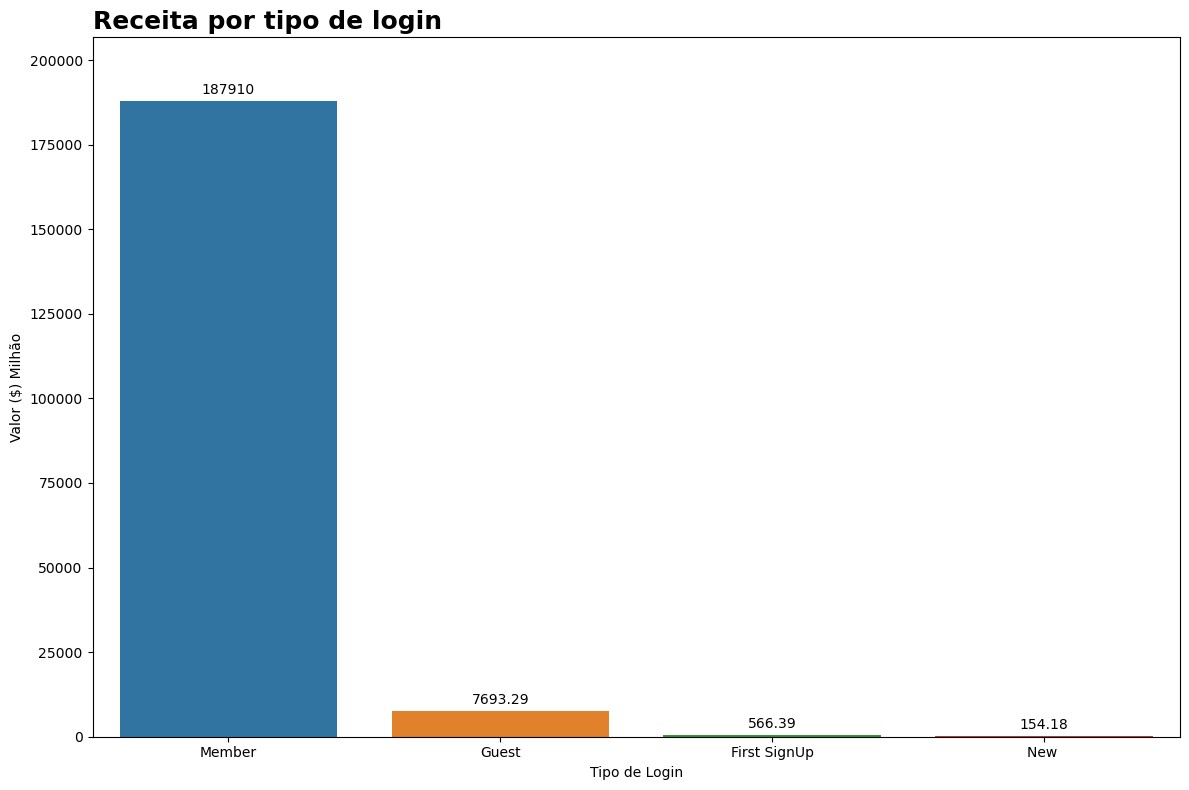

In [70]:
grafico_barra(receita_login, x=receita_login['customer_login_type'], y=receita_login['total_gross_revenue']/100, hue= receita_login['customer_login_type'], titulo='Receita por tipo de login', 
                xlabel='Tipo de Login', ylabel='Valor ($) Milhão')

In [45]:
# Gasto médio por genero
df.groupby('gender')['sales'].mean().sort_values(ascending=False)

gender
Male      153.136713
Female    151.365961
Name: sales, dtype: float64

In [46]:
# Dispositivo preferido por categoria de produto
df.groupby('device_type')['product_category'].count().sort_values(ascending=False)

device_type
Web       47624
Mobile     3658
Name: product_category, dtype: int64

In [47]:
# Clientes recorrentes vs únicos
contagem_clientes = df.groupby('customer_id')['sales'].count()

# Filtrando clientes
clientes_unicos = contagem_clientes[contagem_clientes == 1].index
clientes_recorrentes = contagem_clientes[contagem_clientes > 1].index

# Utilizei lambda para percorrer nosso dataframe para não criar uma função que não utilizarei mais
df['customer_id'].apply(lambda x: 'unico' if x in clientes_unicos else 'recorrente').value_counts()

customer_id
unico         28825
recorrente    22457
Name: count, dtype: int64

# Análise Operacional - KPIs de Logística e Operação

In [48]:
df

,order_datetime,time,lead_time,customer_id,gender,device_type,customer_login_type,product_category,product,sales,quantity,discount,profit,shipping_cost,order_priority,payment_method,total_gross_revenue,total_net_revenue
dt,,,,,,,,,,,,,,,,,,
2018-01-02,2018-01-02 10:56:33,10:56:33,8,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1,0.3,46.0,4.6,Medium,credit_card,140.0,135.80
2018-07-24,2018-07-24 20:41:37,20:41:37,2,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1,0.3,112.0,11.2,Medium,credit_card,211.0,204.67
2018-11-08,2018-11-08 08:38:49,08:38:49,8,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5,0.1,31.2,3.1,Critical,credit_card,585.0,579.15
2018-04-18,2018-04-18 19:28:06,19:28:06,7,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1,0.3,26.2,2.6,High,credit_card,118.0,114.46
2018-08-13,2018-08-13 21:18:39,21:18:39,9,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1,0.3,160.0,16.0,Critical,credit_card,250.0,242.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-28,2018-02-28 22:59:50,22:59:50,6,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4,0.3,19.2,1.9,Medium,money_order,496.0,481.12
2018-02-28,2018-02-28 13:19:25,13:19:25,2,91941,Female,Mobile,Member,Home & Furniture,Umbrellas,70.0,5,0.2,14.0,1.4,Medium,credit_card,350.0,343.00
2018-02-28,2018-02-28 10:25:07,10:25:07,6,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1,0.3,39.7,4.0,Medium,credit_card,133.0,129.01


In [49]:
# Tempo médio de entrega
print(f'Tempo médio de entrega: {round(df["lead_time"].mean())} dias')

Tempo médio de entrega: 5 dias


In [50]:
# Custo médio de frete
print(f'Custo médio de frete: ${round(df["shipping_cost"].mean(), 2)}')

Custo médio de frete: $7.04


In [51]:
# Taxa de frete por vendas
df['sales_ship_fee'] = round(df['shipping_cost']/df['sales']*100, 1)
df['sales_ship_fee']

dt
2018-01-02    3.3
2018-07-24    5.3
2018-11-08    2.6
2018-04-18    2.2
2018-08-13    6.4
             ... 
2018-02-28    1.5
2018-02-28    2.0
2018-02-28    3.0
2018-02-28    6.1
2018-02-28    4.7
Name: sales_ship_fee, Length: 51282, dtype: float64

In [52]:
# Distribuição de prioridade de pedidos
df['order_priority'].value_counts()

order_priority
Medium      29432
High        15498
Critical     3928
Low          2424
Name: count, dtype: int64

In [53]:
# Performance por método de pagamento
df.groupby('payment_method')['sales'].sum().sort_values(ascending=False)

payment_method
credit_card    5818613.0
money_order    1461038.0
e_wallet        422750.0
debit_card      109729.0
not_defined         34.0
Name: sales, dtype: float64

In [54]:
# Eficiência por tipo de dispositivo
df.groupby('device_type')['sales'].sum().sort_values(ascending=False)

device_type
Web       7248824.0
Mobile     563340.0
Name: sales, dtype: float64

In [55]:
# Correlação entre tempo de entrega e satisfação do cliente (através de recompras)
recompras = df.groupby('customer_id')['sales'].count().reset_index()
recompras.columns = ['customer_id', 'num_compras'] # nomeia as colunas

# Separação de clientes que compraram mais de 1 vez
recompras['satisfeito'] = recompras['num_compras'].apply(lambda x: 1 if x > 1 else 0)

# junta tempo de entrega médio do cliente
tempo_entrega = df.groupby('customer_id')['lead_time'].mean().reset_index()
df_corr = recompras.merge(tempo_entrega, on='customer_id')

In [56]:
# Calcula correlação
correlacao = df_corr['lead_time'].corr(df_corr['satisfeito'])
print(f'Correlação entre lead_time e satisfação: {correlacao}')

Correlação entre lead_time e satisfação: -0.0009791386787940531


##### Não houve nenhuma correlação entre o tempo de entrega e a satisfação do cliente dentro nosso caso

# Análise Temporal KPIs Sazonais

In [57]:
df

,order_datetime,time,lead_time,customer_id,gender,device_type,customer_login_type,product_category,product,sales,quantity,discount,profit,shipping_cost,order_priority,payment_method,total_gross_revenue,total_net_revenue,sales_ship_fee
dt,,,,,,,,,,,,,,,,,,,
2018-01-02,2018-01-02 10:56:33,10:56:33,8,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1,0.3,46.0,4.6,Medium,credit_card,140.0,135.80,3.3
2018-07-24,2018-07-24 20:41:37,20:41:37,2,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1,0.3,112.0,11.2,Medium,credit_card,211.0,204.67,5.3
2018-11-08,2018-11-08 08:38:49,08:38:49,8,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5,0.1,31.2,3.1,Critical,credit_card,585.0,579.15,2.6
2018-04-18,2018-04-18 19:28:06,19:28:06,7,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1,0.3,26.2,2.6,High,credit_card,118.0,114.46,2.2
2018-08-13,2018-08-13 21:18:39,21:18:39,9,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1,0.3,160.0,16.0,Critical,credit_card,250.0,242.50,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-28,2018-02-28 22:59:50,22:59:50,6,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4,0.3,19.2,1.9,Medium,money_order,496.0,481.12,1.5
2018-02-28,2018-02-28 13:19:25,13:19:25,2,91941,Female,Mobile,Member,Home & Furniture,Umbrellas,70.0,5,0.2,14.0,1.4,Medium,credit_card,350.0,343.00,2.0
2018-02-28,2018-02-28 10:25:07,10:25:07,6,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1,0.3,39.7,4.0,Medium,credit_card,133.0,129.01,3.0


In [58]:
# Vendas mensais por trimestrais
df.groupby(df['order_datetime'].dt.to_period('Q'))['sales'].sum()

order_datetime
2018Q1    1147624.0
2018Q2    2063853.0
2018Q3    2212522.0
2018Q4    2388165.0
Freq: Q-DEC, Name: sales, dtype: float64

In [59]:
# Picos de venda por hora do dia
df.groupby(df['order_datetime'].dt.to_period('h'))['sales'].sum().sort_values(ascending=False)

order_datetime
2018-11-02 12:00    11377.0
2018-04-24 10:00     7281.0
2018-04-24 23:00     7034.0
2018-05-17 16:00     6922.0
2018-04-24 21:00     6315.0
                     ...   
2018-10-17 00:00       34.0
2018-10-22 01:00       34.0
2018-02-06 07:00       33.0
2018-09-03 08:00       33.0
2018-05-22 02:00       33.0
Freq: h, Name: sales, Length: 7113, dtype: float64

In [60]:
# Dias da semana com maior volume
df.groupby(df['order_datetime'].dt.to_period('s'))['sales'].sum().sort_values(ascending=False)

order_datetime
2018-04-19 11:35:49    496.0
2018-04-24 13:41:16    478.0
2018-11-05 14:55:19    476.0
2018-11-07 21:53:39    474.0
2018-07-18 18:25:54    470.0
                       ...  
2018-02-01 12:57:26     33.0
2018-08-05 14:04:53     33.0
2018-07-15 20:39:37     33.0
2018-08-19 20:09:01     33.0
2018-09-23 18:21:44     33.0
Freq: s, Name: sales, Length: 51114, dtype: float64

In [61]:
# Crescimento MoM (month-over-month)
vendas_mensais = df.groupby(df['order_datetime'].dt.to_period('M'))['sales'].sum()

# Calcula o taxa de crescimento ou queda MoM em percentagem
round(vendas_mensais.pct_change() * 100, 1)

order_datetime
2018-01     NaN
2018-02   -12.4
2018-03    31.0
2018-04    37.1
2018-05    38.1
2018-06   -22.1
2018-07    26.1
2018-08   -18.0
2018-09    11.1
2018-10     0.7
2018-11    18.1
2018-12   -12.6
Freq: M, Name: sales, dtype: float64

# Visualizações

In [62]:
df

,order_datetime,time,lead_time,customer_id,gender,device_type,customer_login_type,product_category,product,sales,quantity,discount,profit,shipping_cost,order_priority,payment_method,total_gross_revenue,total_net_revenue,sales_ship_fee
dt,,,,,,,,,,,,,,,,,,,
2018-01-02,2018-01-02 10:56:33,10:56:33,8,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1,0.3,46.0,4.6,Medium,credit_card,140.0,135.80,3.3
2018-07-24,2018-07-24 20:41:37,20:41:37,2,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1,0.3,112.0,11.2,Medium,credit_card,211.0,204.67,5.3
2018-11-08,2018-11-08 08:38:49,08:38:49,8,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5,0.1,31.2,3.1,Critical,credit_card,585.0,579.15,2.6
2018-04-18,2018-04-18 19:28:06,19:28:06,7,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1,0.3,26.2,2.6,High,credit_card,118.0,114.46,2.2
2018-08-13,2018-08-13 21:18:39,21:18:39,9,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1,0.3,160.0,16.0,Critical,credit_card,250.0,242.50,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-28,2018-02-28 22:59:50,22:59:50,6,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4,0.3,19.2,1.9,Medium,money_order,496.0,481.12,1.5
2018-02-28,2018-02-28 13:19:25,13:19:25,2,91941,Female,Mobile,Member,Home & Furniture,Umbrellas,70.0,5,0.2,14.0,1.4,Medium,credit_card,350.0,343.00,2.0
2018-02-28,2018-02-28 10:25:07,10:25:07,6,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1,0.3,39.7,4.0,Medium,credit_card,133.0,129.01,3.0


In [63]:
grafico_linha()

TypeError: grafico_linha() missing 1 required positional argument: 'df'

In [ ]:
# Buscando balanceamento
#qual_baixa = (len(df[df['col'] < 'num']))
#qual_media = (len(df[df['col'] > 'num'])) & (len(df[df['col'] < 'num']))
#qual_alta = (len(df[df['col'] > 'num']))
#
#print(f'Relação do Balanceamento dos dados')
#print('Qualidade baixo: ', round((qual_baixa / df.shape[0]) * 100, 2),'%')
#print('Qualidade média: ', round((qual_media / df.shape[0]) * 100, 2),'%')
#print('Qualidade alta: ', round((qual_alta / df.shape[0]) * 100, 2),'%')

#### Salvando os dados balanceados para teste dos modelos

In [ ]:
# Salva dados processados
#df.to_csv(f'{DATA_PROCESSED}/modelo_ml.csv', index=False)